### Read Data

In [2]:
import pandas as pd
import numpy as np
import collections, numpy

train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

x_train = np.array(train_data)[:,1:785]
y_train = np.array(train_data)[:,0].reshape((60000,1))

x_validation = x_train[:10000]
y_validation = y_train[:10000]

x_train = x_train[10000:60000]
y_train = y_train[10000:60000]

x_test = np.array(test_data)[:,1:785]
y_test = np.array(test_data)[:,0].reshape((10000,1))

### Show an image

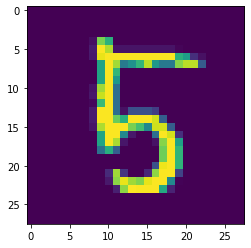

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[30].reshape(28,28))

### Distribution of Classes

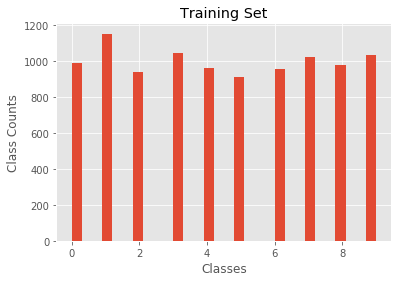

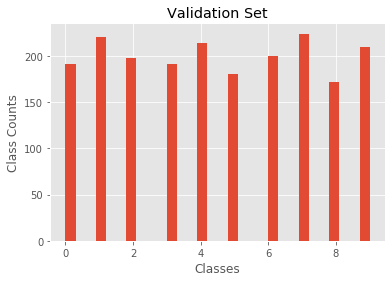

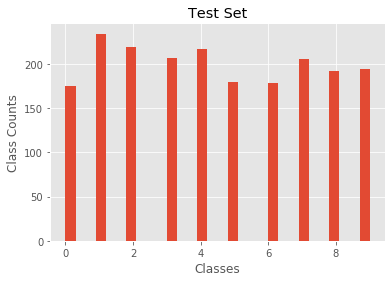

In [5]:
import matplotlib.pyplot as plt
 
plt.style.use('ggplot')
plt.hist(y_train[:10000], bins=30)
plt.title("Training Set")
plt.xlabel("Classes")
plt.ylabel("Class Counts")
plt.show()

plt.figure()

plt.style.use('ggplot')
plt.hist(y_validation[:2000], bins=30)
plt.title("Validation Set")
plt.xlabel("Classes")
plt.ylabel("Class Counts")
plt.show()

plt.figure()

plt.style.use('ggplot')
plt.hist(y_test[:2000], bins=30)
plt.title("Test Set")
plt.xlabel("Classes")
plt.ylabel("Class Counts")
plt.show()

### Data Normalizing

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_validation_normalized = scaler.fit_transform(x_validation)
x_test_normalized = scaler.fit_transform(x_test)
print(x_train_normalized.shape,x_validation_normalized.shape,x_test_normalized.shape)

(50000, 784) (10000, 784) (10000, 784)


### Make 4D Tensor for CNN

In [7]:
x_train_normalized = x_train_normalized.reshape((50000,1,28,28))
x_validation_normalized = x_validation_normalized.reshape((10000,1,28,28))
x_test_normalized = x_test_normalized.reshape((10000,1,28,28))
print(x_train_normalized.shape,x_validation_normalized.shape,x_test_normalized.shape)

(50000, 1, 28, 28) (10000, 1, 28, 28) (10000, 1, 28, 28)


In [8]:
y_train[0]

array([3], dtype=int64)

### One Hot Encoded Labels

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(y_train).toarray()
y_validation = enc.fit_transform(y_validation).toarray()
y_test = enc.fit_transform(y_test).toarray()
print(y_train.shape,y_validation.shape,y_test.shape)

(50000, 10) (10000, 10) (10000, 10)


In [10]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

### Make PyTorch Tensor

In [11]:
import torch
x_train_normalized = torch.tensor(x_train_normalized).float()
x_validation_normalized = torch.tensor(x_validation_normalized).float()
x_test_normalized = torch.tensor(x_test_normalized).float()
y_train = torch.tensor(y_train).float()
y_validation= torch.tensor(y_validation).float()
y_test = torch.tensor(y_test).float()

In [12]:
y_test[0]

tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### Model

In [19]:
from IPython.core.debugger import set_trace # debug
import torch.nn as nn
import torch.optim as optimizer
#-----------------------------------
#Settings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np
import cv2
import sys
import numpy
from sklearn.model_selection import train_test_split
import pandas as pd #data processing
import warnings
import matplotlib.image as mpimg
import torch
warnings.filterwarnings('ignore')
numpy.set_printoptions(threshold=sys.maxsize) #full print setting
from sklearn.datasets import make_regression


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        channel = 50
        self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = channel, kernel_size = 5) 
        torch.nn.init.xavier_uniform(self.conv1.weight)
        self.conv2 = torch.nn.Conv2d(in_channels = channel, out_channels = channel, kernel_size = 3)
        torch.nn.init.xavier_uniform(self.conv2.weight)
        self.conv3 = torch.nn.Conv2d(in_channels = channel, out_channels =channel, kernel_size = 1)
        torch.nn.init.xavier_uniform(self.conv3.weight)
        
        self.dropout1 = nn.Dropout2d(0.25)
        
        #self.dropout2 = nn.Dropout2d(0.5)
        
        self.pool = nn.MaxPool2d(2, 2)
    
        self.beta1 = nn.Linear(channel*2*2, 3)
        #torch.nn.init.xavier_uniform(self.beta1.weight)
        self.beta2 = nn.Linear(3, 10)
        #torch.nn.init.xavier_uniform(self.beta2.weight)
        self.beta3 = nn.Linear(10, 30)
        self.beta4 = nn.Linear(30, 10)
        #torch.nn.init.xavier_uniform(self.beta3.weight)
        
        self.output_of_CNN = []
        self.output_of_ANN = []
        
    def forward(self, X, training, i):
        
        channel=50
       
        y=self.conv1(X) 
        y=torch.nn.functional.relu(y)
        y=self.pool(y) 
        
        y=self.conv2(y) 
        y=torch.nn.functional.relu(y)
        y=self.pool(y) 
        
        y=self.conv3(y) 
        y=torch.nn.functional.relu(y)
        y=self.pool(y)
        
        
        
        
        
    
        y = y.view(X.shape[0], channel*2*2)
        
        if training == True and i==998:
            self.output_of_CNN.append(y)
            
        
        y=self.dropout1(y)
        
        
        #print(y.shape)
     
        y=self.beta1(y)
        
        #print("debug")
        
        y=torch.nn.functional.relu(y)
        y=self.beta2(y)
        y=torch.nn.functional.relu(y)
        
        y=self.dropout1(y)
        
        y=self.beta3(y)
        y=self.beta4(y)
    
        y = torch.nn.functional.softmax(y, dim=None)
        
        if training == True and i==998:
            outputs = [torch.argmax(sample).detach().numpy() for sample in list(y)]
            self.output_of_ANN.append(outputs)
        
        return y
    
    def predict(self, model, x_test, y_test):
        import numpy as np
        y_test = y_test.detach().numpy()
        
        model.eval() 
        with torch.no_grad():
            predictions = model(x_test, False,0)
            
        predictions = predictions.detach().numpy()
        one_hot_pred = [ 1 for i in range(predictions.shape[0]) if np.argmax(predictions[i]) == np.argmax(y_test[i]) ]
        accuracy = (len(one_hot_pred)/predictions.shape[0])*100
        return accuracy
        
#Parameters      
#***************************************************************************************************************************
learning_rate = 0.001
epoch = 1000
savingRate = 1 # Loading and making prediction at epoch every loadParameters times 
model = Net()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
#***************************************************************************************************************************
epoch_list = []
validation_loss_list = []
training_loss_list = []
accuracy_list = []

for i in range(epoch):
    
        epoch_list.append(i)
        
        #Training
        model.train()
        optimizer.zero_grad() 
        y_prediction = model(x_train_normalized[:10000], True,i) 
        loss = loss_fn(y_prediction, y_train[:10000]) 
        training_loss_list.append(loss.item())
        loss.backward() 
        optimizer.step() 
        print("[Epoch {}] : Training Loss: {}".format(i,loss))
        
        
        #Evaluation
        model.eval() 
        with torch.no_grad():
            y_validation_prediction = model(x_validation_normalized[:2000],False,0)  
        loss = loss_fn(y_validation_prediction, y_validation[:2000])
        validation_loss_list.append(loss.item())
        print("          Validation Loss: {}".format(loss))
        
        
        #Performance
        accuracy = model.predict(model, x_test_normalized[:2000], y_test[:2000])
        accuracy_list.append(accuracy)
        print("          Accuracy in the Test Set: %{}".format(accuracy))
        
        
        #Save the Model
        if(i%savingRate==0): 
            #ModelSaving
            checkpoint = {'model': Net(),
                        'state_dict': model.state_dict(),
                        'optimizer' : optimizer.state_dict()}

            torch.save(checkpoint, 'models/Epoch {} Checkpoint.pth'.format(i))
            print("Model kaydedildi.")
        
            
    
        print("************************************************")
        



[Epoch 0] : Training Loss: 0.09006773680448532
          Validation Loss: 0.09003222733736038
          Accuracy in the Test Set: %9.6
Model kaydedildi.
************************************************
[Epoch 1] : Training Loss: 0.09002400189638138
          Validation Loss: 0.09001366049051285
          Accuracy in the Test Set: %9.6
Model kaydedildi.
************************************************
[Epoch 2] : Training Loss: 0.09001322090625763
          Validation Loss: 0.08999601006507874
          Accuracy in the Test Set: %9.6
Model kaydedildi.
************************************************
[Epoch 3] : Training Loss: 0.09000617265701294
          Validation Loss: 0.08997701853513718
          Accuracy in the Test Set: %11.700000000000001
Model kaydedildi.
************************************************
[Epoch 4] : Training Loss: 0.08998500555753708
          Validation Loss: 0.08995422720909119
          Accuracy in the Test Set: %11.700000000000001
Model kaydedildi.
*********

No handles with labels found to put in legend.


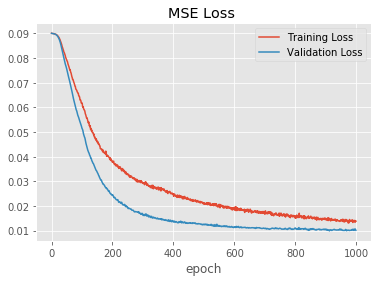

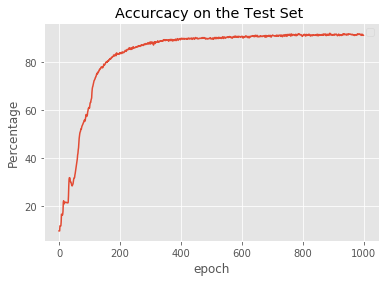

In [28]:
fig, ax = plt.subplots()
ax.plot(epoch_list, training_loss_list, label="Training Loss")
ax.plot(epoch_list, validation_loss_list, label="Validation Loss")
ax.set_xlabel("epoch")
ax.set_title("MSE Loss ")
ax.legend();

fig, ax = plt.subplots()
ax.plot(epoch_list, accuracy_list)
ax.set_title("Accurcacy on the Test Set ")
ax.set_xlabel("epoch")
ax.set_ylabel("Percentage")
ax.legend();

In [27]:
model

Net(
  (conv1): Conv2d(1, 50, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(50, 50, kernel_size=(1, 1), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (beta1): Linear(in_features=200, out_features=3, bias=True)
  (beta2): Linear(in_features=3, out_features=10, bias=True)
  (beta3): Linear(in_features=10, out_features=30, bias=True)
  (beta4): Linear(in_features=30, out_features=10, bias=True)
)

In [ ]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    model.eval()
    return model

filepath = "Epoch 999 Checkpoint.pth"
model = load_checkpoint(filepath)

### I apply k-Means clustering to output of pre-trained CNNs

In [62]:
cnn_output = model.output_of_CNN[0].detach().numpy()
ann_output = np.array(model.output_of_ANN[0]).reshape((10000,1)).ravel()
print("CNN output shape:", cnn_output.shape)
print("ANN output shape:", ann_output.shape)

CNN output shape: (10000, 200)
ANN output shape: (10000,)


In [129]:
x_train = x_train_normalized[:100].detach().numpy().reshape((100,784))

### k-Means on initial x_train

In [130]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(x_train)
print(kmeans.labels_)

[6 1 4 5 5 3 2 2 9 8 0 6 9 5 2 1 8 7 5 4 2 1 9 5 1 3 3 1 8 8 9 6 0 4 6 1 7
 7 0 4 2 2 9 4 9 3 4 5 2 4 5 1 6 7 4 4 9 1 2 4 4 1 6 4 5 2 6 1 2 3 5 3 8 8
 6 8 7 4 2 1 9 8 8 3 8 2 5 8 2 1 8 6 6 6 5 4 4 6 2 6]


### k-Means on pre-trained CNNs

In [131]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=10, random_state=0)
z = kmeans.fit(cnn_output)

In [132]:
print("Pre-trained CNN then k-Means clustering:\n", kmeans.labels_[:100]) # CNN + k-Means
print("Pre-trained CNN then ANN classification:\n",ann_output[:100]) #Accuracy is %91.35 => CNN + ANN

Pre-trained CNN then k-Means clustering:
 [5 1 9 4 4 8 3 3 1 6 8 5 1 4 0 0 6 7 4 0 3 3 8 4 6 8 8 3 8 6 0 5 7 2 5 0 7
 7 8 9 3 1 6 4 8 8 9 4 2 0 9 0 5 7 1 4 0 1 3 4 4 1 1 9 4 0 1 3 3 8 0 8 6 6
 5 6 7 9 6 1 8 6 6 8 6 3 8 6 2 3 6 0 0 5 4 9 9 5 3 5]
Pre-trained CNN then ANN classification:
 [3 8 7 9 9 0 1 1 5 1 0 3 8 4 7 5 2 6 4 7 1 8 0 9 2 0 0 1 9 2 5 3 6 4 3 5 6
 6 8 7 1 8 2 9 0 0 7 9 6 5 7 5 3 6 8 9 5 8 1 9 4 8 5 7 4 5 8 1 1 0 9 0 2 2
 3 2 6 7 2 8 0 2 2 0 2 1 5 2 9 6 2 5 9 3 9 7 7 3 1 3]
